<a href="https://colab.research.google.com/github/abigailsleek/TEAM-B.-TASK-5/blob/master/movies_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# section 1

> this includes importing libraries and data preparation.




In [23]:
# first off, we are going to be importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random as rd
from scipy.sparse import csr_matrix
from scipy.cluster.hierarchy import linkage, dendrogram

!pip install helper
import helper

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity



next, we are going to load the dataset to pandas dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
moviesDT = pd.read_csv('/content/drive/My Drive/Member/movies - movies.csv')
moviesDT.head()

,rank,title,genre,wiki_plot,imdb_plot,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


so i want to drop all these unnecessary data for simplicity and ease.

In [5]:
moviesDT.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],axis=1, inplace=True)
moviesDT.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


here, i'm going to merge the wiki_plot and the imdb_plot since they have slightly different summaries of the same movie, so i want to combine and form a single plot for easy computation.

In [6]:

moviesDT['plot'] = moviesDT['wiki_plot'].astype(str) + "\n" + \
                 moviesDT['imdb_plot'].astype(str)

moviesDT.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [7]:
# statistics of my moviesDT
moviesDT.describe()

,rank,title,genre,wiki_plot,imdb_plot,plot
count,101,101,101,101,91,102
unique,101,101,62,101,91,102
top,84,West Side Story,[u' Drama'],"In a Louisiana nursing home in 1999, Paul Edge...",An American flag back-lighted by the afternoon...,\n\n\n\nDonna Reed (as Mary Bailey) and James ...
freq,1,1,11,1,1,1


# Pre-processing my data in Natural Languge
> this includes:



1.   Tokenization
2.   Stemming






next, i'm going to tokenize my data.
Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are dicarded. So i'm going to use the NLTK method of tokenization.



In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
# Tokenize a paragraph from the wizard of oz into sentences and store in  a variable 'sent_tokenized'
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                         Dorothy and her friends are hindered and menaced by the Wicked Witch of the West.
                         She incites trees to throw apples at them, then tries to set the scarecrow on fire.
                        """)]

# Word Tokenize first sentence from sent_tokenized, save the result in a variable 'words_tokenized'
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

#I'm going to need to import a library that helps remove tokens that do not contain any letters from words_tokenized
import re

filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

# Let's observe words after tokenization
filtered

['Dorothy',
 'and',
 'her',
 'friends',
 'are',
 'hindered',
 'and',
 'menaced',
 'by',
 'the',
 'Wicked',
 'Witch',
 'of',
 'the',
 'West']

Next, i'm going to stem my already filtered data. Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix. There are several stemming models, including Porter and Snowball.

In [0]:
from nltk.stem.snowball import SnowballStemmer


In [11]:

# I want to create a SnowballStemmer object in english
stemmer = SnowballStemmer("english")

# let's observe words without stemming
print("Without stemming: ", filtered)




Without stemming:  ['Dorothy', 'and', 'her', 'friends', 'are', 'hindered', 'and', 'menaced', 'by', 'the', 'Wicked', 'Witch', 'of', 'the', 'West']


In [12]:
#  I want to Stem the words from filtered data above and store in a variable'stemmed_words'
stemmed_words = [stemmer.stem(word) for word in filtered]
# now let's check out after stemming
print("After stemming:   ", stemmed_words)

After stemming:    ['dorothi', 'and', 'her', 'friend', 'are', 'hinder', 'and', 'menac', 'by', 'the', 'wick', 'witch', 'of', 'the', 'west']


**clubbing**

so i want to wrap the tokenized and stemmed text together so that i can create a TF-IDF vector of the text. Basically clubbing just makes the work easier by merging the filtered and stem text together as one instead of creating a TF-IDF vector simultaneously for the stem and filtered text, it's done just once on the clubbed data.

In [13]:
# I am going to define a function to perform both stemming and tokenization
def tokenize_plus_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems

words_stemmed = tokenize_plus_stem("Dorothy and her friends are hindered and menaced by the Wicked Witch of the West.")
print(words_stemmed)

['dorothi', 'and', 'her', 'friend', 'are', 'hinder', 'and', 'menac', 'by', 'the', 'wick', 'witch', 'of', 'the', 'west']


#  Section 3

> this icludes the use of algorithms like:

*  ** TF-TDF VECTORIZER**





You know computers are not naturally smart except we make to and they don't understand texts only 0's and 1's. So we are going to need to transform the texts to numbers for it to be meaningful to the computer.

TF-IDF (term frequency-inverse document frequency) is a metric that represents how 'important' a word is to a document in the document set.

In [0]:
 
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:

# Instantiate TfidfVectorizer object with stopwords and tokenizer with necessary parameters for efficient processing of text
tfidf_myobject = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_plus_stem,
                                 ngram_range=(1,3))

So right now, let's fit the text and then transform the text to produce the corresponding numeric form of the data which the computer will be able to understand and derive meaning from. To do this, use the fit_transform() method of the TfidfVectorizer object.

In [17]:
# Fit and transform the tfidf_myobject using  the "plot" of each movie
tfidf_matrix = tfidf_myobject.fit_transform([x for x in moviesDT["plot"]])

print(tfidf_matrix.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(102, 535)


# clustering

Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.


 k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.
 K-means is an algorithm which helps us to implement clustering in Python.
 
 The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

In [18]:

#Let's create a KMeans object with 5 clusters and store as km
km = KMeans(n_clusters=5)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
# Create a column cluster to denote the generated cluster for each movie
moviesDT["cluster"] = clusters
moviesDT['cluster'].value_counts() 

1    34
4    25
0    25
2    12
3     6
Name: cluster, dtype: int64

In [0]:

similarity_distance = 1 - cosine_similarity(tfidf_matrix)

**let's go ahead and create the dendrogram**

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering.

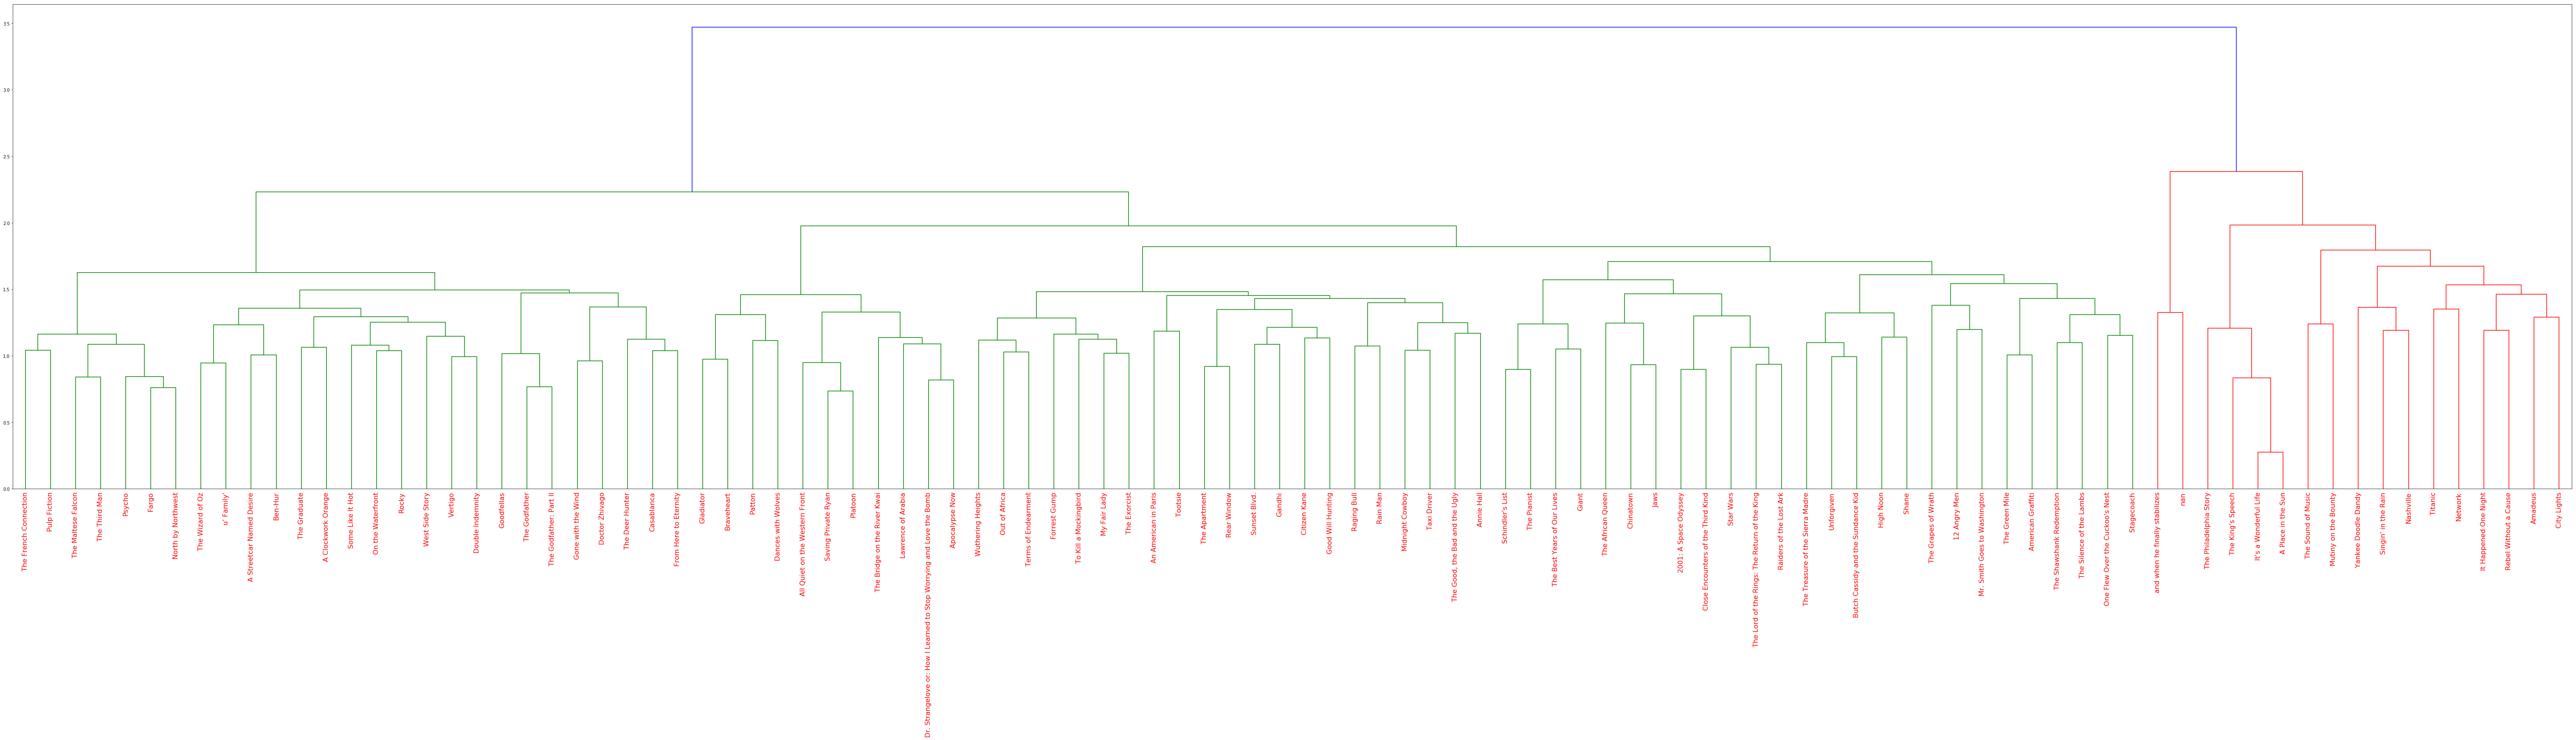

In [24]:
# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

dendrogram_ = dendrogram(mergings,
               labels=[x for x in moviesDT["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)
plt.show()

# OBSERVATION 


from the dendrogram above, you will notice that based on the distance calculation gotten from cosine _similarity, we have been able to cluster similar movies. 

 Therefore, supposing i am searching for a similar movie after Fargo, it definately will be Northwest, or if you look up The Gradute, a similar movie to it will be A Clockwork Orange. That is how movie similarity works using the above clustering methods.


 